In [25]:
"""
TUEP Dataset
"""

import numpy as np

def norm_adj(train_graphs):
    for i in range(train_graphs.shape[0]):
        for j in range(train_graphs.shape[1]):
            min_ = (train_graphs[i, j, :, :]).min()
            max_ = (train_graphs[i, j, :, :]).max()
            train_graphs[i, j, :,  :] = (train_graphs[i, j, :,  :] - min_)/(max_ - min_)
                
    return train_graphs
    
plv_graphs = np.load("../saved_npy_ep/features/train_graphs_plv.npy", mmap_mode="c").astype(np.float16)
plv_graphs = norm_adj(plv_graphs)

coh_graphs = np.load("../saved_npy_ep/features/train_graphs_coh.npy", mmap_mode="c").astype(np.float16)
coh_graphs = norm_adj(coh_graphs)
train_labels = np.load("../saved_npy_ep/features/train_y.npy", mmap_mode="c").astype(np.float16)

In [26]:
import networkx as nx

def efficiency(graphs, eff_type="local"):
    dyn_eff = []
    for gr in graphs:
        effs = []
        for i in range(60):
            g = gr[i]
            g[g<0.5] = 0
            g = nx.Graph(g)
            if eff_type == "local":
                effs.append(nx.local_efficiency(g))
            elif eff_type == "global":
                effs.append(nx.global_efficiency(g))
        dyn_eff.append(effs)
    
    dyn_eff = np.array(dyn_eff)
    return dyn_eff

global_coh_eff = efficiency(coh_graphs, eff_type="global")
local_coh_eff = efficiency(coh_graphs, eff_type="local")
global_plv_eff = efficiency(plv_graphs, eff_type="global")
local_plv_eff = efficiency(plv_graphs, eff_type="local")

In [27]:
global_coh_eff.shape, local_coh_eff.shape

((1871, 60), (1871, 60))

figures/local_coh
figures/global_coh
figures/local_plv
figures/global_plv


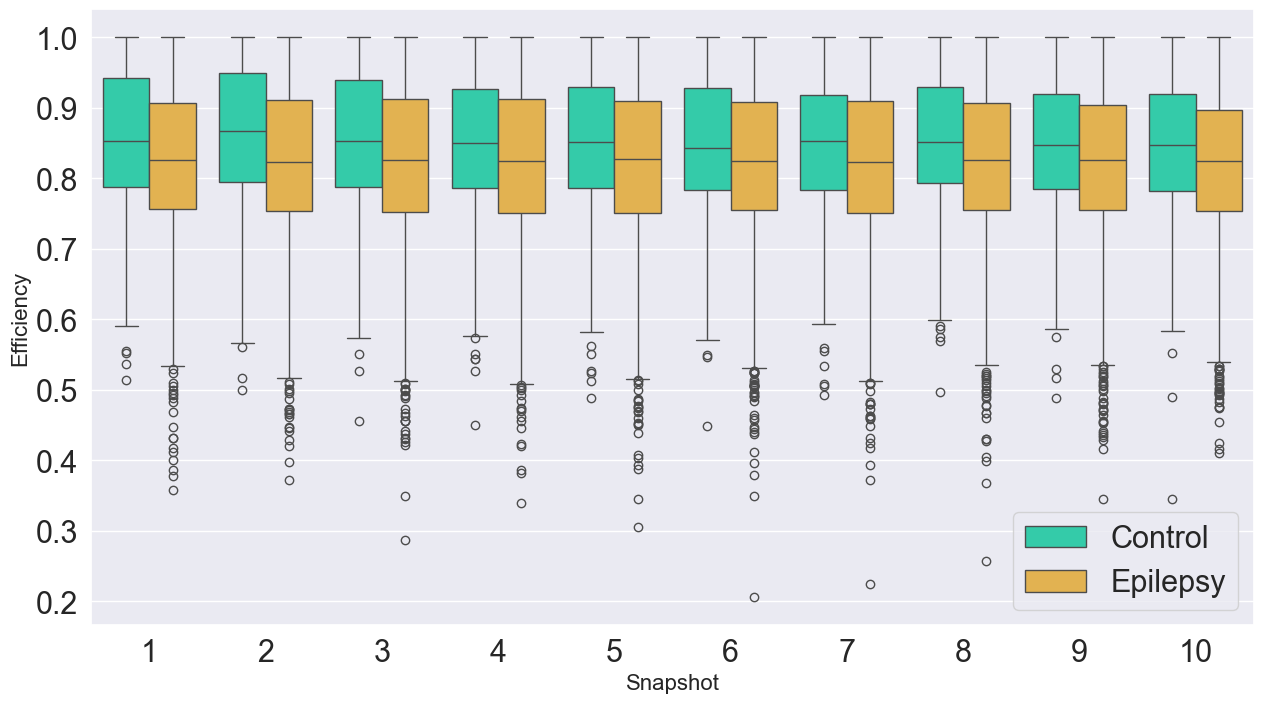

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot(efficiency, y, conn):
    y = y.squeeze()
    print(conn)
    d_no = []
    d_ab = []
    for i in range(60):
        y_0 = [True if yi == 0 else False for yi in y]
        y_1 = [True if yi == 1 else False for yi in y]
        d_1 = efficiency[y_0, i] 
        d_no.append(d_1)
        d_2 = efficiency[y_1, i]
        d_ab.append(d_2)
            
    d_no = np.array(d_no)
    d_ab = np.array(d_ab)
    
    abnormal = pd.DataFrame({i: d_ab[i-1] for i in range(1, 11)})
    normal = pd.DataFrame({i: d_no[i-1] for i in range(1, 11)})
    
    df = pd.concat({'Control': normal.melt(), 'Epilepsy': abnormal.melt()}, names=['source', 'old_index'])
    df = df.reset_index(level=0).reset_index(drop=True)
    plt.figure(figsize=(15,8))
    sns.set(font_scale = 2)
    sns.boxplot(data=df, x='variable', y='value', hue='source', palette='turbo')
    plt.xlabel("Snapshot", fontsize=16)
    plt.ylabel("Efficiency", fontsize=16)
    plt.legend(loc='lower right')
    plt.savefig(conn+'.pdf')

plot(local_coh_eff, train_labels, conn="figures/local_coh")
plot(global_coh_eff, train_labels, conn="figures/global_coh")
plot(local_plv_eff, train_labels, conn="figures/local_plv")
plot(global_plv_eff, train_labels, conn="figures/global_plv")

In [29]:
global_coh_eff = efficiency(coh_graphs, eff_type="global")
local_coh_eff = efficiency(coh_graphs, eff_type="local")
global_plv_eff = efficiency(plv_graphs, eff_type="global")
local_plv_eff = efficiency(plv_graphs, eff_type="local")

(1871, 60)

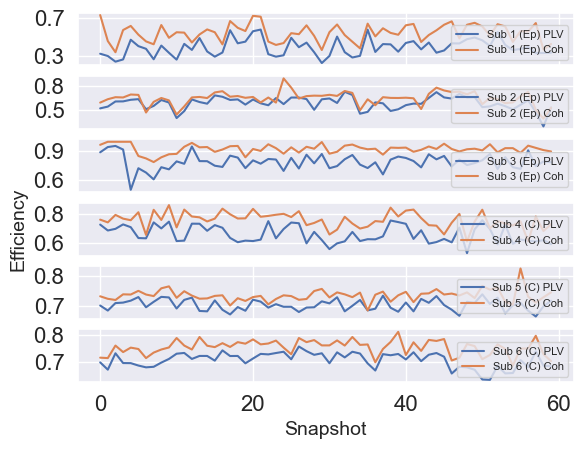

In [106]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(611)
plt.plot(global_plv_eff[8], label='Sub 1 (Ep) PLV')
plt.plot(global_coh_eff[8], label='Sub 1 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.3, 0.7], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(612)
plt.xticks([])
plt.plot(global_plv_eff[6], label='Sub 2 (Ep) PLV')
plt.plot(global_coh_eff[6], label='Sub 2 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.subplot(613)
plt.xticks([])
plt.plot(global_plv_eff[15], label='Sub 3 (Ep) PLV')
plt.plot(global_coh_eff[15], label='Sub 3 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.6, 0.9], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(614)
plt.ylabel('Efficiency', fontsize=14)
plt.xticks([])
plt.plot(global_plv_eff[25], label='Sub 4 (C) PLV')
plt.plot(global_coh_eff[25], label='Sub 4 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.6, 0.8], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(615)
plt.plot(global_plv_eff[9], label='Sub 5 (C) PLV')
plt.plot(global_coh_eff[9], label='Sub 5 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.7, 0.85], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(616)
plt.plot(global_plv_eff[27], label='Sub 6 (C) PLV')
plt.plot(global_coh_eff[27], label='Sub 6 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.65, 0.8], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Snapshot',fontsize=14)
plt.savefig("figures/sub_global_efficiency.pdf", bbox_inches='tight')
plt.show()

In [107]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(1)
plt.subplot(611)
plt.xticks([])
plt.plot(local_plv_eff[8], label='Sub 1 (Ep) PLV')
plt.plot(local_coh_eff[8], label='Sub 1 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.4, 0.7], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(612)
plt.xticks([])
plt.plot(local_plv_eff[6], label='Sub 2 (Ep) PLV')
plt.plot(local_coh_eff[6], label='Sub 2 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.4, 0.8], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(613)
plt.xticks([])
plt.plot(local_plv_eff[15], label='Sub 3 (Ep) PLV')
plt.plot(local_coh_eff[15], label='Sub 3 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.6, 0.9], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(614)
plt.ylabel('Efficiency', fontsize=14)
plt.xticks([])
plt.plot(local_plv_eff[25], label='Sub 4 (C) PLV')
plt.plot(local_coh_eff[25], label='Sub 4 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.7, 0.8], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(615)
plt.plot(local_plv_eff[9], label='Sub 5 (C) PLV')
plt.plot(local_coh_eff[9], label='Sub 5 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.7, 0.85], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(616)
plt.plot(local_plv_eff[27], label='Sub 6 (C) PLV')
plt.plot(local_coh_eff[27], label='Sub 6 (C) Coh')
plt.legend(loc='lower right',fontsize=8)
plt.yticks([0.6, 0.8], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Snapshot', fontsize=14)
plt.savefig("figures/sub_local_efficiency.pdf", bbox_inches='tight')
plt.show()

In [93]:
from scipy.stats import f

effs = [local_plv_eff, local_coh_eff, global_plv_eff, global_coh_eff]
effs_name = ["local_plv_eff", "local_coh_eff", "global_plv_eff", "global_coh_eff"]

for idx, eff in enumerate(effs):
    print(effs_name[idx])
    normal_std = []
    ep_std = []
    normal_mean = []
    ep_mean = []
    for i in range(eff.shape[0]):
        if train_labels[i][0] == 0:
            normal_std.append(np.std(eff[i]))
            normal_mean.append(np.mean(eff[i]))
        else:
            ep_std.append(np.std(eff[i]))
            ep_mean.append(np.mean(eff[i]))
            
    # Calculate the sample variances
    variance1 = np.var(normal_std, ddof=1)
    variance2 = np.var(ep_std, ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_std) - 1
    df2 = len(ep_std) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print("Reject the null hypothesis")

local_plv_eff
P-value: 0.00015769047299269326
Reject the null hypothesis
local_coh_eff
P-value: 5.45167923232052e-05
Reject the null hypothesis
global_plv_eff
P-value: 0.6813105197173296
global_coh_eff
P-value: 0.12273705644322283


In [384]:
import networkx as nx

def communicability(graphs):
    dyn_com = []
    for gr in graphs:
        comms = []
        for i in range(50):
            g = gr[i]
            g[g<0.5] = 0
            g = nx.Graph(g)
            g = nx.communicability(g)
            out = []
            for gi in g.values():
                out.append(list(gi.values()))
            out = np.array(out)
            comms.append(out)
        dyn_com.append(comms)
    
    dyn_com = np.array(dyn_com)
    return dyn_com

coh_com = communicability(coh_graphs)
plv_com = communicability(plv_graphs)

In [385]:
coh_com.shape

(1871, 50, 19, 19)

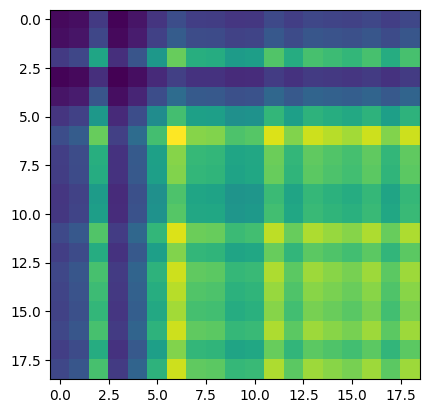

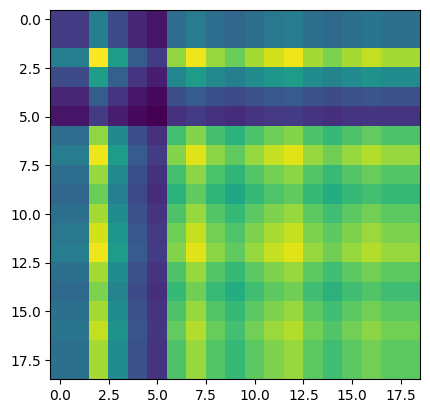

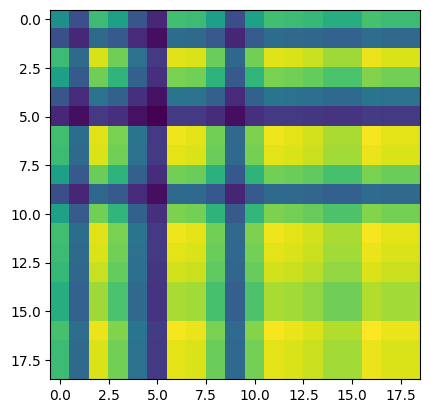

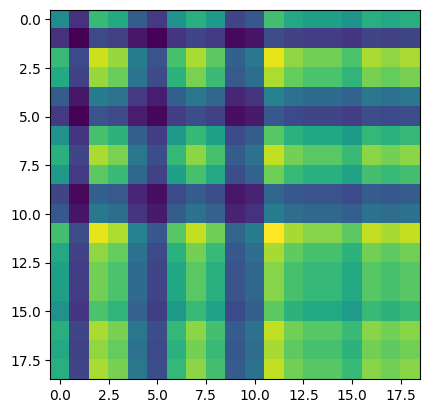

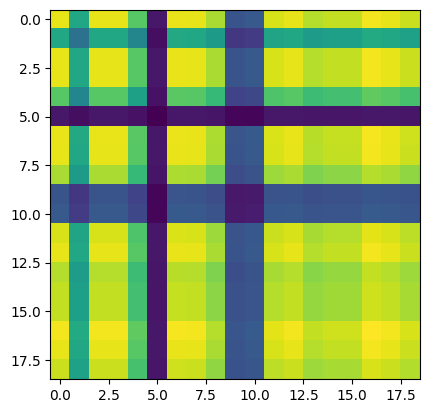

In [386]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(coh_com[3, i])
    plt.show()

In [218]:
coh_com.shape

(50, 1871, 19, 19)

In [201]:
coh_com[0, -5, 0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

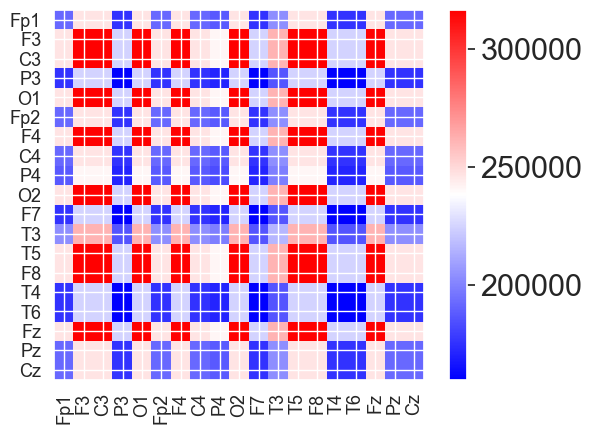

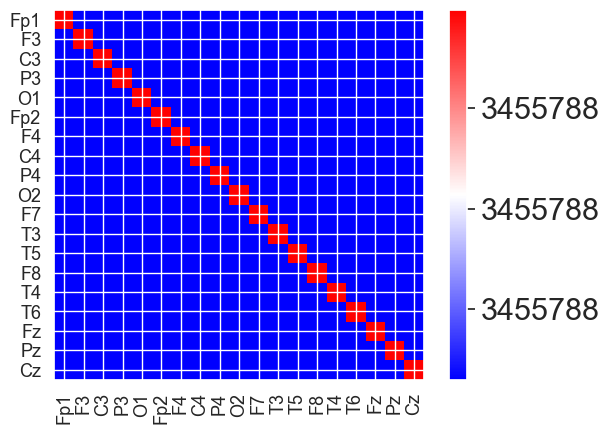

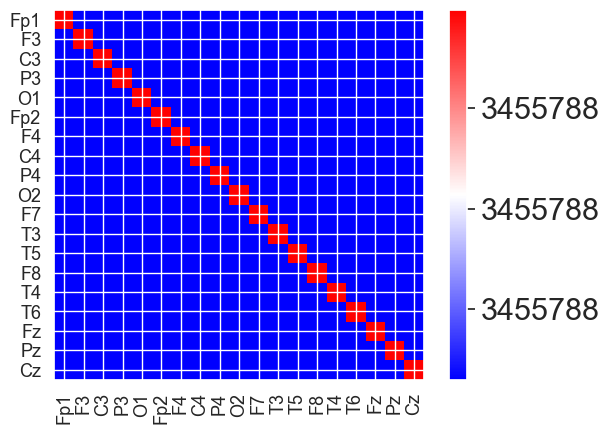

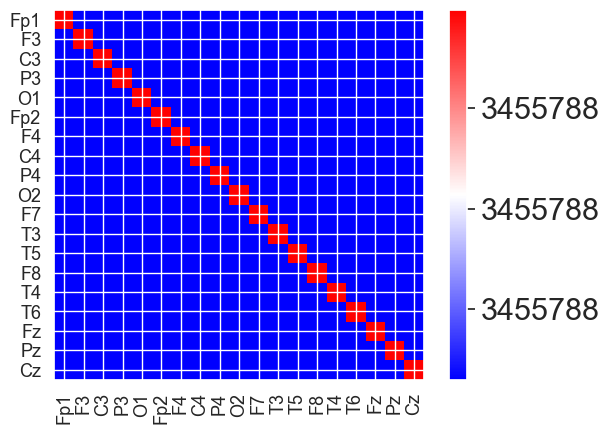

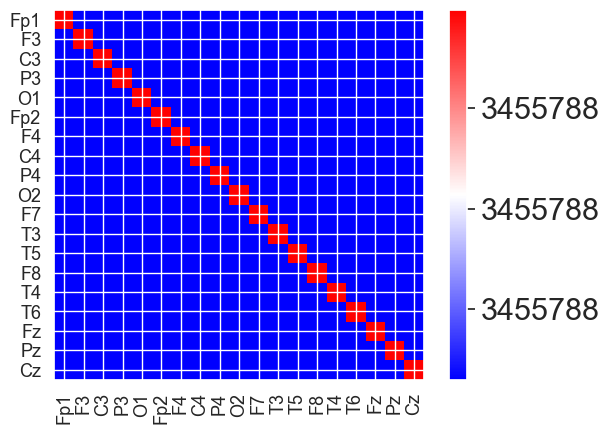

In [228]:
def plot_single_edges(arr, fig_path):
    ch_names_renamed = ['Fp1', 'F3', 'C3', 'P3', 'O1', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F7', 
                'T3', 'T5', 'F8', 'T4', 'T6', 'Fz', 'Pz', 'Cz']

    my_xticks = ch_names_renamed
    x = range(19)
    fig, ax = plt.subplots()
    vmin = np.min(arr)
    vmax = np.max(arr)
    
    im = plt.imshow(arr, cmap='bwr', interpolation='nearest', vmin=vmin, vmax=vmax)
    ax.set_xticks(x, my_xticks, rotation=90, fontsize=13)
    ax.set_yticks(x, my_xticks, fontsize=13)
    
    plt.colorbar(im, format='%1.0f')
    fig.savefig(fig_path, bbox_inches='tight')
    plt.show()

for i in range(5):
    plot_single_edges(coh_com[123, i], "figures/"+str(i)+"_"+str(0)+".pdf")

In [207]:
coh_com.shape

(50, 1871, 19, 19)

In [93]:
from scipy.sparse import csgraph
def lap(graphs):
    dyn_lap = []
    for gr in graphs:
        laps = []
        for i in range(50):
            g = gr[i]
            g[g<0.5] = 0
            g = csgraph.laplacian(g, normed=True)
            np.fill_diagonal(g, 0)
            laps.append(g)
        dyn_lap.append(laps)
    
    dyn_lap = np.array(dyn_lap)
    return dyn_lap

coh_lap = lap(coh_graphs)
plv_lap = lap(plv_graphs)

In [250]:
coh_lap.shape

(1871, 50, 19, 19)

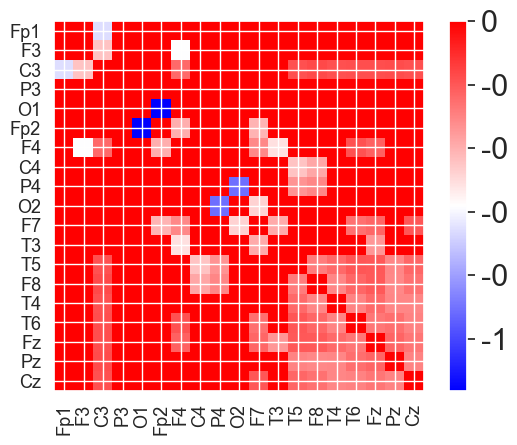

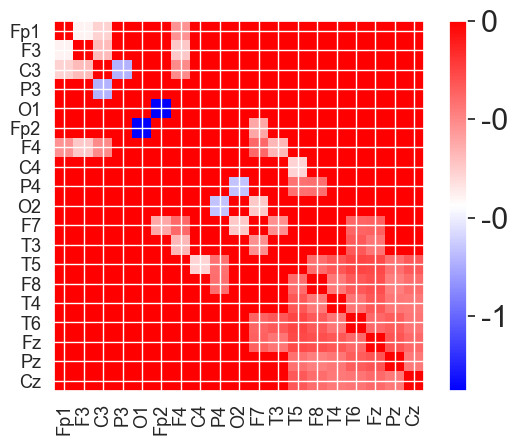

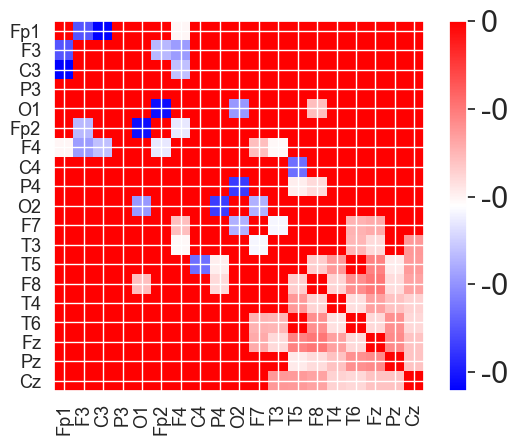

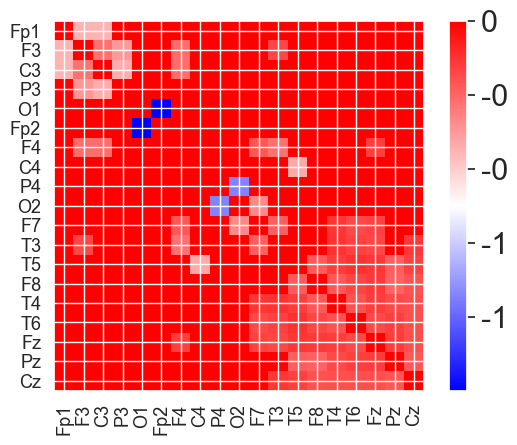

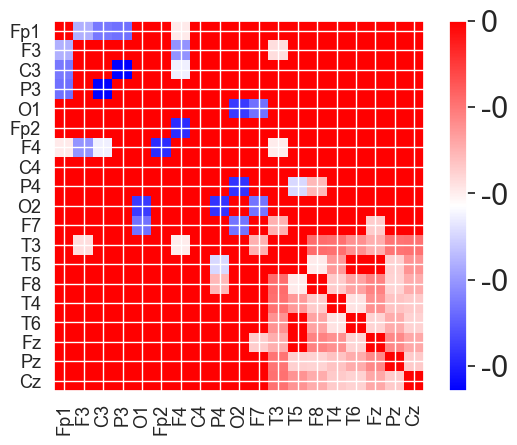

In [251]:
for i in range(5):
    plot_single_edges(plv_lap[4, i], "figures/"+str(i)+"_"+str(0)+".pdf")

In [261]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Combine into a list of matrices
matrices = [arr for arr in plv_lap[7]]

# Flatten each matrix into a 1D array
vectors = [matrix.flatten() for matrix in matrices]

# Calculate pairwise distances between vectors (using Euclidean distance)
distances = pairwise_distances(vectors, metric='euclidean')

# Perform k-means clustering (e.g., with 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(distances)

# Get cluster labels
labels = kmeans.labels_

print(f"Cluster labels: {labels}")

# Example: Analyzing clusters (you can adapt this to your needs)
for i in range(2):
    cluster_indices = np.where(labels == i)[0]
    print(f"Cluster {i+1}: Matrices {cluster_indices + 1}")

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0]
Cluster 1: Matrices [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 48 49 50]
Cluster 2: Matrices [14 45 46]


In [253]:
matrix1.shape

(3, 3)

In [254]:
plv_lap.shape

(1871, 50, 19, 19)

In [155]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


# Combine into a list of matrices
matrices = [arr for arr in coh_graphs[5]]

# Flatten each matrix into a 1D array
vectors = [matrix.flatten() for matrix in matrices]
vectors = np.array(vectors)
# Calculate pairwise distances between vectors (using Euclidean distance)
distances = pairwise_distances(vectors, metric='euclidean')
scaler = StandardScaler()

distances = scaler.fit_transform(distances)
# Perform k-means clustering (e.g., with 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(distances)

# Get cluster labels
labels = kmeans.labels_

In [168]:
from sklearn.cluster import SpectralClustering
import numpy as np

# Example adjacency matrix (replace with your actual matrix)
# A = np.array([[0, 1, 1, 0, 0],
#               [1, 0, 1, 0, 0],
#               [1, 1, 0, 0, 0],
#               [0, 0, 0, 0, 1],
#               [0, 0, 0, 1, 0]])

# For demonstration, let's create a simple block-diagonal-like adjacency matrix
A = coh_graphs[5, 8]
# Set affinity='precomputed' to use the adjacency matrix directly
n_clusters = 2 # Number of clusters you expect
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
labels = spectral_clustering.fit_predict(A)

print("Cluster labels:", labels)

Cluster labels: [0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0]


In [172]:
A.shape

(19, 19)

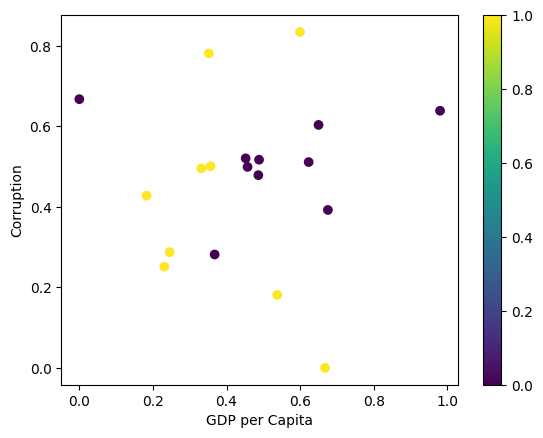

In [174]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(A[:, 0], A[:, 1], c=labels)
ax.set_title('')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

In [121]:
"""
TUEP Dataset
"""

import numpy as np

def norm_adj(train_graphs):
    for i in range(train_graphs.shape[0]):
        for j in range(train_graphs.shape[1]):
            min_ = (train_graphs[i, j, :, :]).min()
            max_ = (train_graphs[i, j, :, :]).max()
            train_graphs[i, j, :,  :] = (train_graphs[i, j, :,  :] - min_)/(max_ - min_)
                
    return train_graphs
    
plv_graphs = np.load("../saved_npy_ep/features/test_graphs_plv.npy", mmap_mode="c").astype(np.float16)
plv_graphs = norm_adj(plv_graphs)

coh_graphs = np.load("../saved_npy_ep/features/test_graphs_coh.npy", mmap_mode="c").astype(np.float16)
coh_graphs = norm_adj(coh_graphs)
train_labels = np.load("../saved_npy_ep/features/test_y.npy", mmap_mode="c").astype(np.float16)

In [122]:
coh_graphs.shape

(121, 60, 19, 19)

In [123]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
preds = []


for i in range(60):
    # Combine into a list of matrices
    matrices = [arr for arr in coh_graphs[:, i]]
    
    # Flatten each matrix into a 1D array
    vectors = [matrix.flatten() for matrix in matrices]
    distances = pairwise_distances(vectors, metric='euclidean')

    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

    distances = scaler.fit_transform(distances)
    # Calculate pairwise distances between vectors (using Euclidean distance)
    kmeans.fit(distances)
    
    # Get cluster labels
    labels = kmeans.labels_
    preds.append(labels)

In [124]:
coh_graphs.shape

(121, 60, 19, 19)

In [125]:
labels = kmeans.predict(distances)

In [126]:
distances.shape

(121, 121)

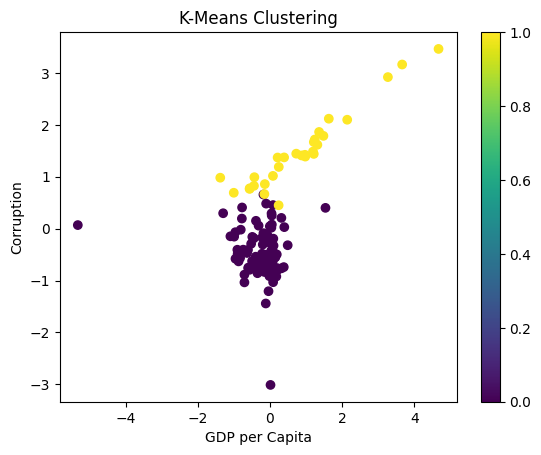

In [127]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(distances[:, 3],distances[:, 10], c=labels)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

In [494]:
coh_graphs.shape

(121, 60, 19, 19)

In [495]:
preds = np.array(preds)
preds = np.sum(preds, 0)

In [496]:
preds.shape

(121,)

In [499]:
preds_ = [1 if i >10 else 0 for i in preds]
from sklearn.metrics import accuracy_score
accuracy_score(preds_, train_labels)

0.8677685950413223

In [523]:
plv_graphs.shape

(1871, 60, 19, 19)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
edge_colors = plt.cm.Blues
node_colors = 'red'


def plot_graph(G, ax, add_edge_labels=False):
    #plt.figure(figsize=(7,7))

    # plot nodes
    nx.draw_networkx_nodes(G,
                           node_positions,
                           nodelist=nodelist,
                           node_size=800, 
                           node_color=node_colors,
                           alpha=0.7,
                           ax=ax)

    # plot node labels
    nx.draw_networkx_labels(G,
                            node_positions,
                            labels=dict(zip(nodelist, nodelist)),
                            font_color='white',
                            font_size=14,
                            font_weight='bold',
                            ax=ax
                           )
    
    edge_weights = nx.get_edge_attributes(G,'weight')
    
    # plot edges
    plt_graph_obj = nx.draw_networkx_edges(
        G, node_positions,
        edge_cmap=edge_colors,
        arrows=False,
        width=3,
        connectionstyle='arc3, rad = 0.1',
        edge_color=[G[u][v]['weight'] for u, v in G.edges],
        ax=ax
    )
    
    # plot edge labels (weights)
    if add_edge_labels:
        edge_labels = nx.draw_networkx_edge_labels(
            G, node_positions,
            edge_labels=edge_weights,
            label_pos=0.5,
            ax=ax
        )


# electrode positions for the graph nodes
# based on the international 10-20 system
node_positions = {'FP1': (-0.4, 0.45), 'FP2': (0.4, 0.45),
                  'F7': (-1.25, 0.33), 'F3': (-0.65, 0.255),
                  'FZ': (0.0, 0.225), 'F4': (0.65, 0.255),
                  'F8': (1.25, 0.33), 'T3': (-1.5, 0.0),
                  'C3': (-0.75, 0.0), 'CZ': (0.0, 0.0),
                  'C4': (0.75, 0.0), 'T4': (1.5, 0.0),
                  'T5': (-1.25, -0.33), 'P3': (-0.65, -0.255),
                  'PZ': (0.0, -0.225), 'P4': (0.65, -0.255),
                  'T6': (1.25, -0.33), 'O1': (-0.4, -0.45),
                  'O2': (0.4, -0.45)
                 }

nodelist = node_positions.keys()

ch_names = ["FP1", "FP2", "F7", "F3", "FZ", "F4", "F8",
            "T3", "C3", "CZ", "C4", "T4", "T5",
            "P3", "PZ", "P4", "T6", "O1", "O2"]

In [90]:
g = plv_graphs[3, 0]

/var/folders/4k/d3wc_jw93m12xqfn1fcfg_2w0000gr/T/ipykernel_48771/546905260.py:32: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  plt_graph_obj = nx.draw_networkx_edges(


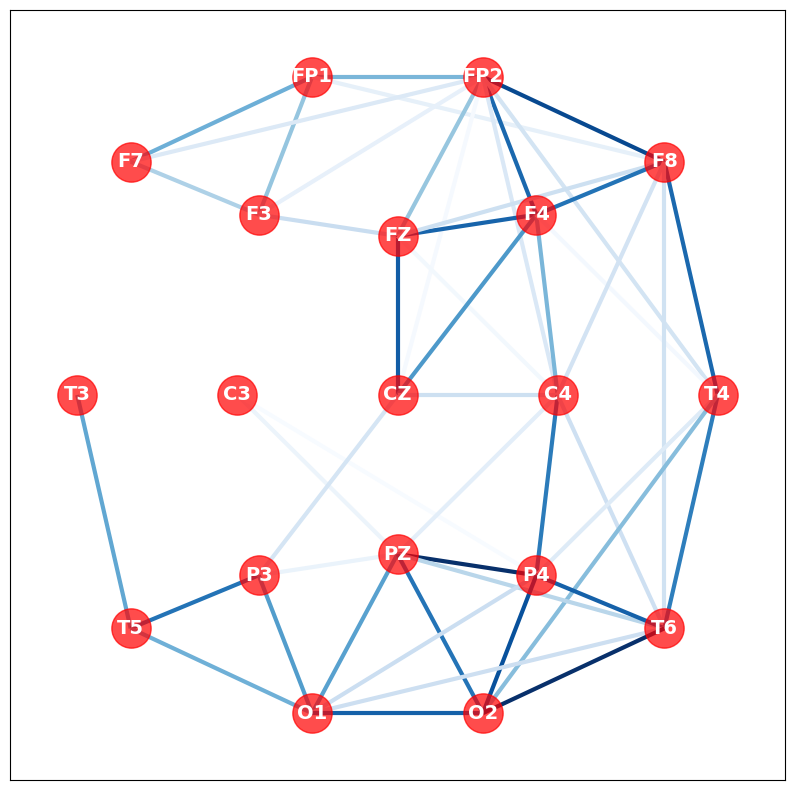

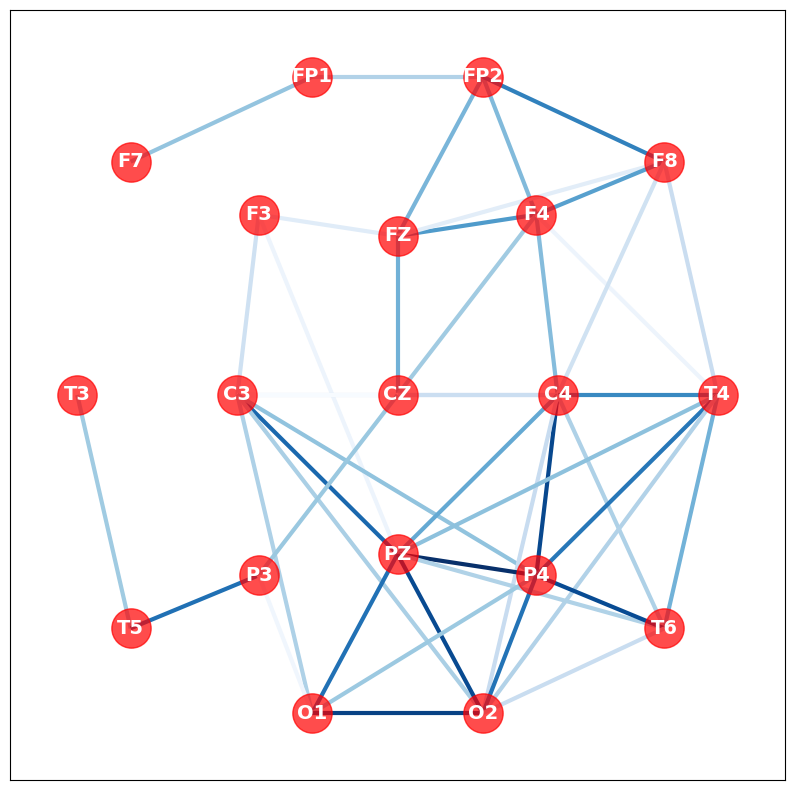

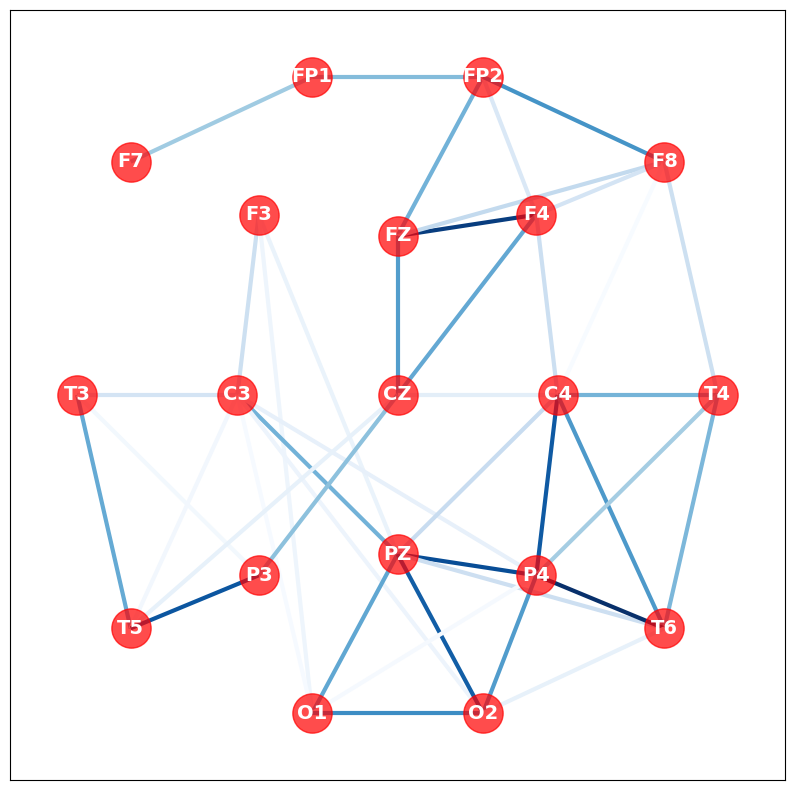

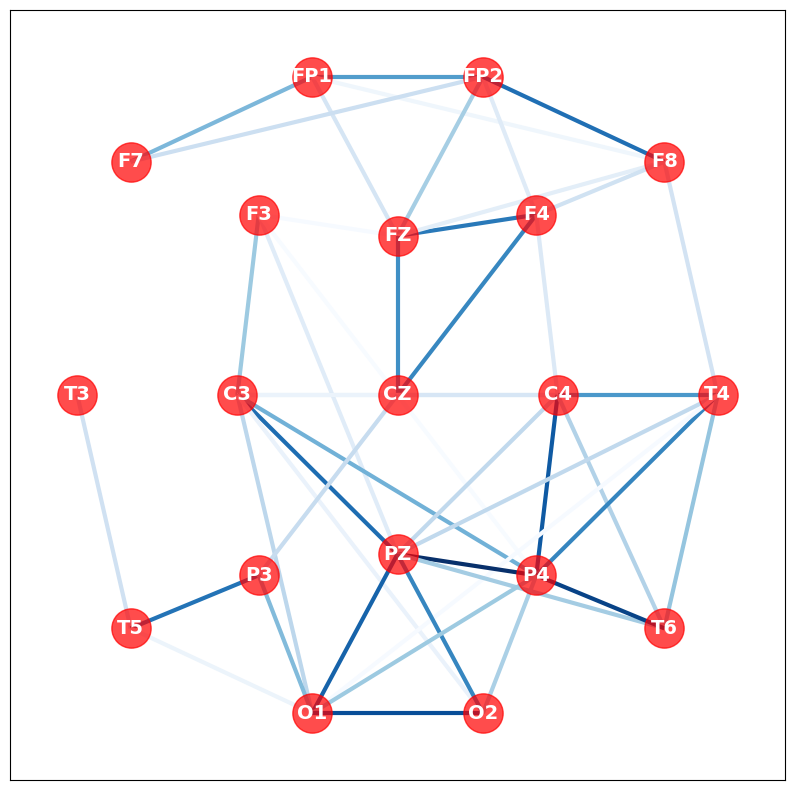

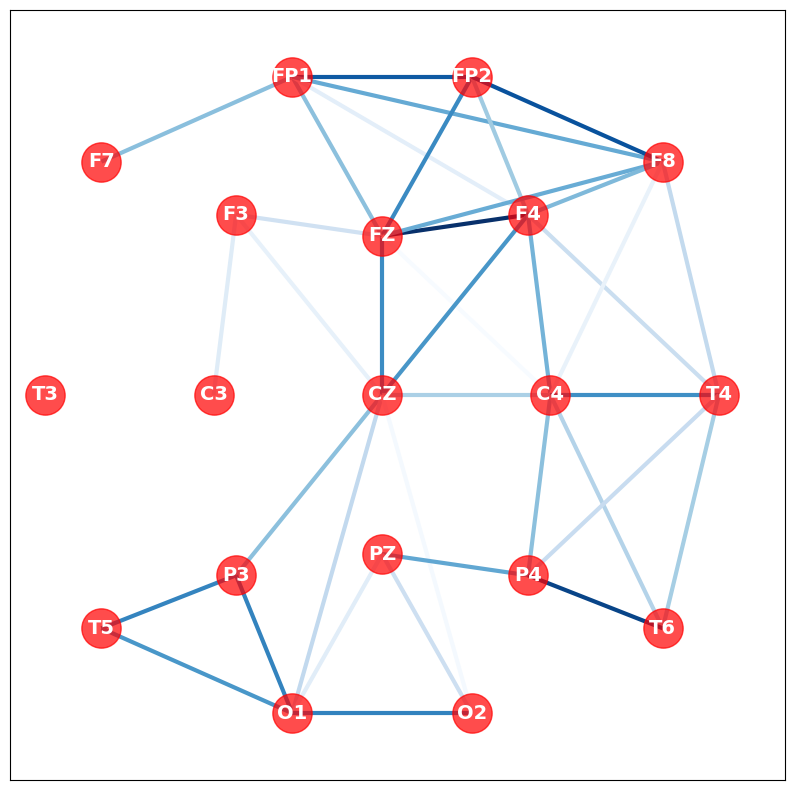

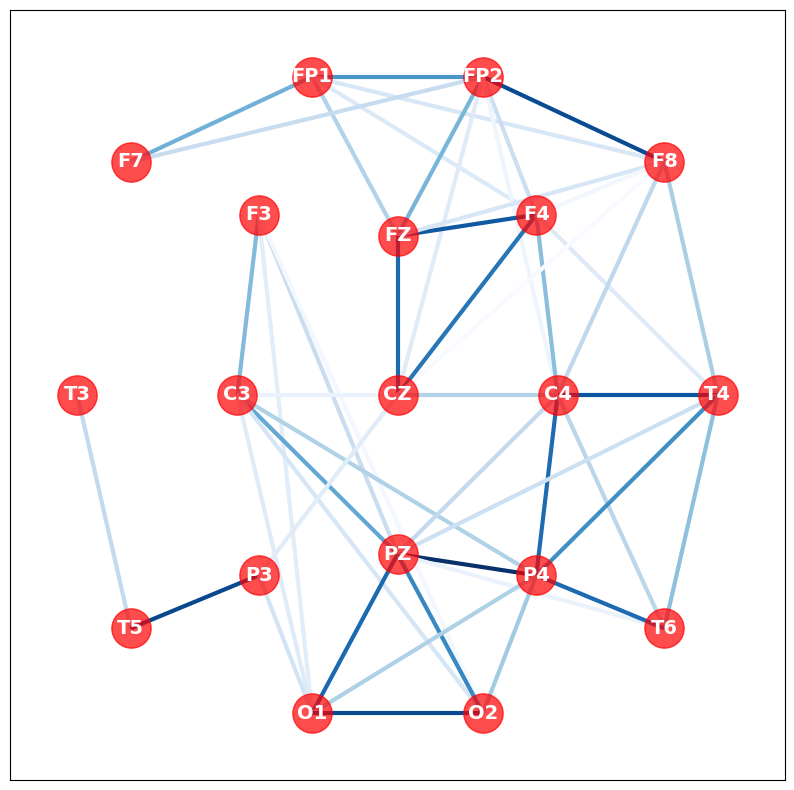

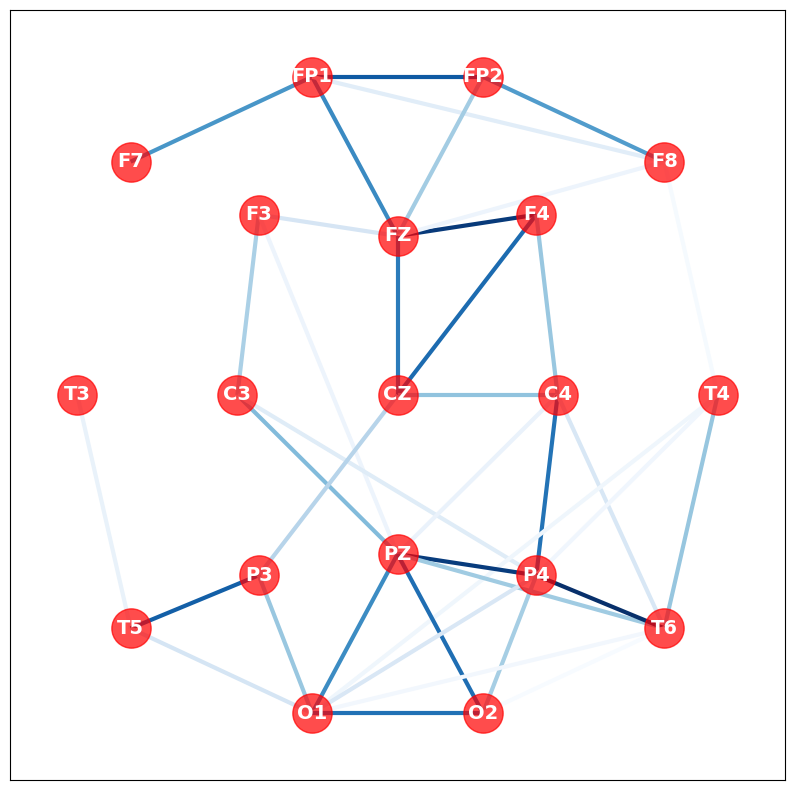

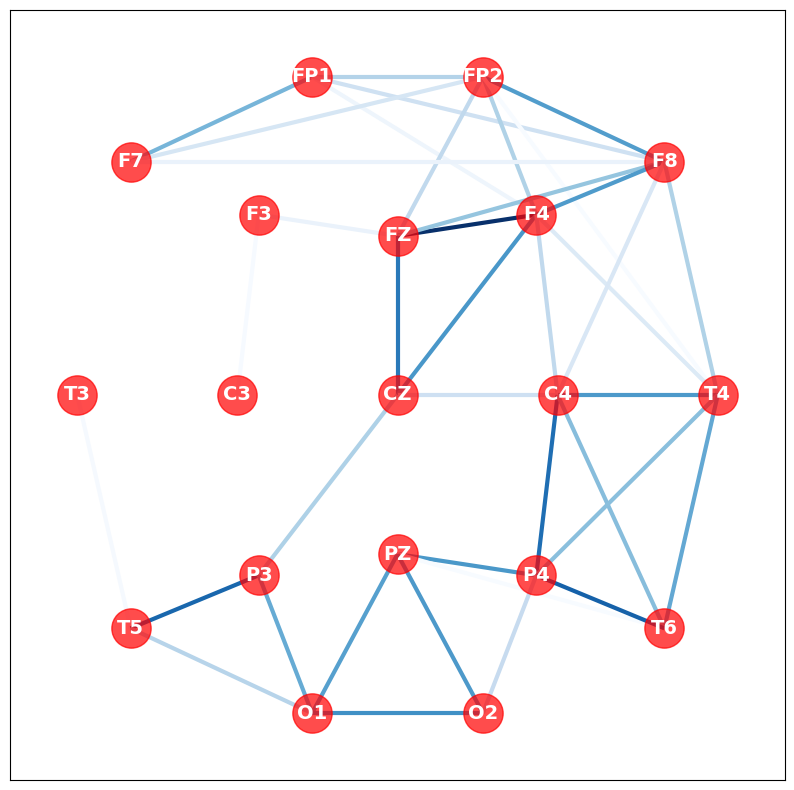

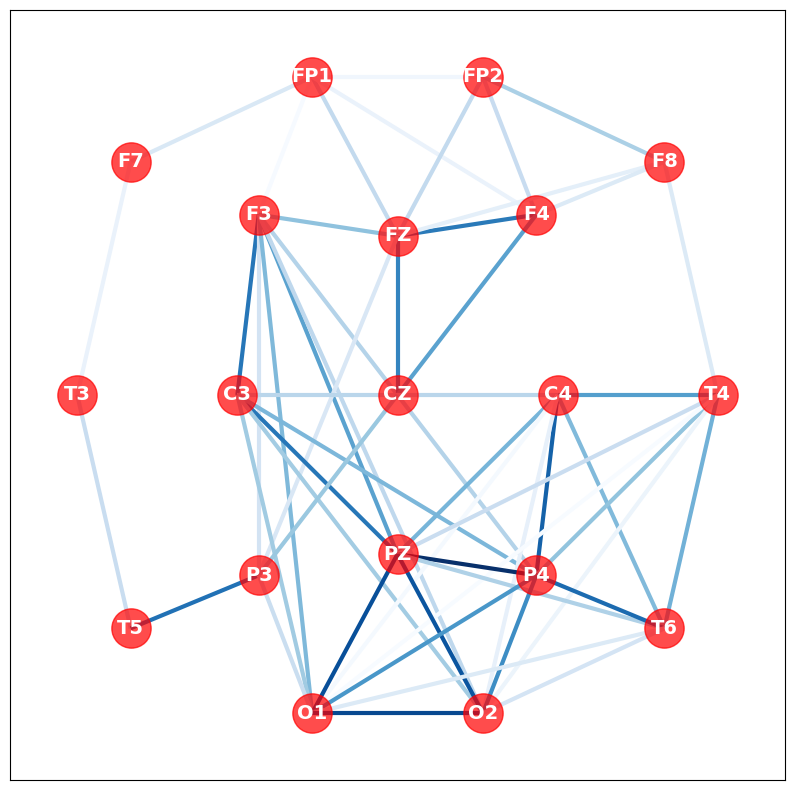

In [92]:
#from scipy.stats import iqr
for i in range(0, 50, 5):
    g = plv_graphs[12, i]
    threshold = 0.5
    X1 = nx.Graph()
    X1.add_nodes_from(node_positions.keys())
    
    for n, p in node_positions.items():
        X1.nodes[n]['pos'] = p
    
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if g[i, j] > threshold:
                if i != j:
                    X1.add_edge(ch1, ch2, weight=g[i, j])
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    plot_graph(X1, ax, add_edge_labels=False)
    #fig.savefig("sub2_int_mask_0_7.pdf", bbox_inches='tight')

In [106]:
plv_graphs = np.load("../saved_npy_ep/features/train_graphs_plv.npy", mmap_mode="c").astype(np.float16)
plv_graphs = norm_adj(plv_graphs)

coh_graphs = np.load("../saved_npy_ep/features/train_graphs_coh.npy", mmap_mode="c").astype(np.float16)
coh_graphs = norm_adj(coh_graphs)
train_labels = np.load("../saved_npy_ep/features/train_y.npy", mmap_mode="c").astype(np.float16)

In [5]:
def gen_degrees(graphs):
    all_g_degrees = []
    for i in range(graphs.shape[0]):
        all_degrees = []
        for j in range(graphs.shape[1]):
            degrees = []
            g = graphs[i, j]
            g = (g - g.min())/(g.max() - g.min())
            g[g<0.5] = 0
            g[g>=0.5] = 1
            g = nx.Graph(g)
            d = nx.degree(g)
            d = list(d)
            for deg in d:
                degrees.append(deg[1])
            all_degrees.append(degrees)
        all_g_degrees.append(all_degrees)
    all_g_degrees = np.array(all_g_degrees)
    return all_g_degrees

all_plv_degrees = gen_degrees(plv_graphs)
all_coh_degrees = gen_degrees(coh_graphs)

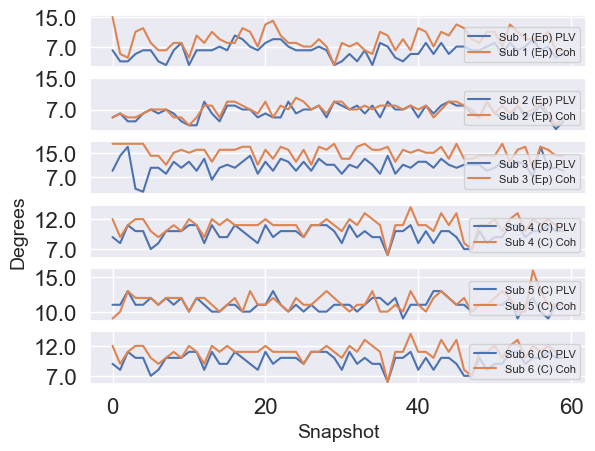

In [117]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(611)
plt.plot(all_plv_degrees[8, :, -1].T , label='Sub 1 (Ep) PLV')
plt.plot(all_coh_degrees[8, :, -1].T , label='Sub 1 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(612)
plt.xticks([])
plt.plot(all_plv_degrees[6, :, -1].T, label='Sub 2 (Ep) PLV')
plt.plot(all_coh_degrees[6, :, -1].T, label='Sub 2 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(613)
plt.xticks([])
plt.plot(all_plv_degrees[15, :, -1].T, label='Sub 3 (Ep) PLV')
plt.plot(all_coh_degrees[15, :, -1].T, label='Sub 3 (Ep) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(614)
plt.ylabel('Degrees', fontsize=14)
plt.xticks([])
plt.plot(all_plv_degrees[27, :, -1].T, label='Sub 4 (C) PLV')
plt.plot(all_coh_degrees[27, :, -1].T, label='Sub 4 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 12], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(615)
plt.plot(all_plv_degrees[9, :, -1].T, label='Sub 5 (C) PLV')
plt.plot(all_coh_degrees[9, :, -1].T, label='Sub 5 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([10, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(616)
plt.plot(all_plv_degrees[27, :, -1].T, label='Sub 6 (C) PLV')
plt.plot(all_coh_degrees[27, :, -1].T, label='Sub 6 (C) Coh')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 12], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Snapshot',fontsize=14)
plt.savefig("figures/sub_degrees.pdf", bbox_inches='tight')
plt.show()

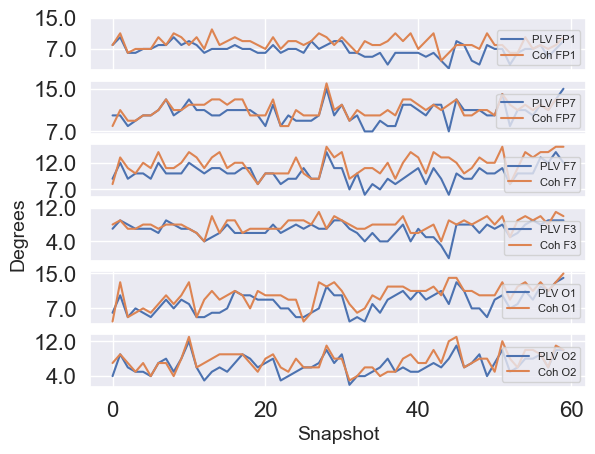

In [122]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(611)
plt.plot(all_plv_degrees[10, :, 0].T, label='PLV FP1')
plt.plot(all_coh_degrees[10, :, 0].T, label='Coh FP1')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(612)
plt.xticks([])
plt.plot(all_plv_degrees[10, :, 1].T, label='PLV FP7')
plt.plot(all_coh_degrees[10, :, 1].T, label='Coh FP7')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(613)
plt.xticks([])
plt.plot(all_plv_degrees[10, :, 2].T, label='PLV F7')
plt.plot(all_coh_degrees[10, :, 2].T, label='Coh F7')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 12], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(614)
plt.ylabel('Degrees', fontsize=14)
plt.xticks([])
plt.plot(all_plv_degrees[10, :, 3].T, label='PLV F3')
plt.plot(all_coh_degrees[10, :, 3].T, label='Coh F3')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([4, 12], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(615)
plt.plot(all_plv_degrees[10, :, -2].T, label='PLV O1')
plt.plot(all_coh_degrees[10, :, -2].T, label='Coh O1')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([7, 15], fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(616)
plt.plot(all_plv_degrees[10, :, -1].T, label='PLV O2')
plt.plot(all_coh_degrees[10, :, -1].T, label='Coh O2')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.legend(loc='lower right',fontsize=8)
plt.yticks([4, 12], fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Snapshot',fontsize=14)
plt.savefig("figures/ch_degree.pdf", bbox_inches='tight')
plt.show()

In [110]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_g_degrees.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_g_degrees[i]))
        normal_mean.append(np.mean(all_g_degrees[i]))
    else:
        ep_std.append(np.std(all_g_degrees[i]))
        ep_mean.append(np.mean(all_g_degrees[i]))
        
my_dict = {'Control': normal_std, 'Epilepsy': ep_std}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
plt.yticks(fontsize=16)

fig.savefig("figures/degree_groups.pdf", bbox_inches='tight')

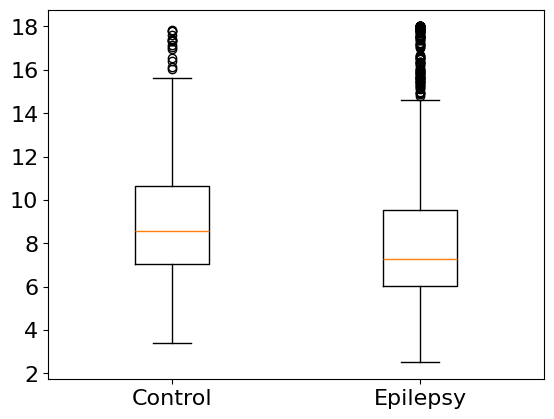

In [111]:
my_dict = {'Control': normal_mean, 'Epilepsy': ep_mean}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_aspect(0.1)
fig.savefig("figures/degree_groups_mean.pdf", bbox_inches='tight')

In [112]:
from scipy.stats import f

# Calculate the sample variances
variance1 = np.var(normal_mean, ddof=1)
variance2 = np.var(ep_mean, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_mean) - 1
df2 = len(ep_mean) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

#f_statistic, p_value = f_oneway(normal_mean, ep_mean)
alpha = 0.05

print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 1.4390884417854437e-05
Reject the null hypothesis


In [113]:
# Calculate the sample variances
variance1 = np.var(normal_std, ddof=1)
variance2 = np.var(ep_std, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_std) - 1
df2 = len(ep_std) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

alpha = 0.05
#print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 0.0450506613554943
Reject the null hypothesis


In [114]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_g_degrees.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_g_degrees[i], axis=0))
        normal_mean.append(np.mean(all_g_degrees[i], axis=0))
    else:
        ep_std.append(np.std(all_g_degrees[i], axis=0))
        ep_mean.append(np.mean(all_g_degrees[i], axis=0))

normal_std = np.array(normal_std)
ep_std = np.array(ep_std)
ch_names = ["FP1", "FP2", "F7", "F3", "FZ", "F4", "F8",
            "T3", "C3", "CZ", "C4", "T4", "T5",
            "P3", "PZ", "P4", "T6", "O1", "O2"]
signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_std[:, ch_idx], ddof=1)
    variance2 = np.var(ep_std[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_std[:, ch_idx]) - 1
    df2 = len(ep_std[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.9990843786896827
FP2 : 0.9926212637305577
F7 : 0.9913555502138537
F3 : 0.9999847381612641
FZ : 0.9419733134425703
F4 : 0.9998126552834316
F8 : 0.9969052760791167
T3 : 0.9866034680098561
C3 : 0.45811619330268183
CZ : 0.36599054237447487
C4 : 0.5009612874651146
T4 : 0.8406938011106623
T5 : 0.8223288217722485
P3 : 0.07951432528890338
PZ : 0.07083547077619998
P4 : 0.949206813114037
T6 : 0.8287076288954619
O1 : 0.28628151694950643
O2 : 0.37390394015284023


In [115]:
import mne
import matplotlib
def plot_bands_per_regions(zeros, file_name):
    # electrode positions for the graph nodes
    # based on the international 10-20 system
    ch_names = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", 
                        "T3", "C3", "Cz", "C4", "T4", "T5",
                        "P3", "Pz", "P4", "T6", "O1", "O2"]
    
    node_positions = {'FP1': (-0.4, 0.45), 'FP2': (0.4, 0.45),
                      'F7': (-1.25, 0.33), 'F3': (-0.65, 0.255),
                      'FZ': (0.0, 0.225), 'F4': (0.65, 0.255),
                      'F8': (1.25, 0.33), 'T3': (-1.5, 0.0),
                      'C3': (-0.75, 0.0), 'CZ': (0.0, 0.0),
                      'C4': (0.75, 0.0), 'T4': (1.5, 0.0),
                      'T5': (-1.25, -0.33), 'P3': (-0.65, -0.255),
                      'PZ': (0.0, -0.225), 'P4': (0.65, -0.255),
                      'T6': (1.25, -0.33), 'O1': (-0.4, -0.45),
                      'O2': (0.4, -0.45)}

    fig = plt.figure(figsize=(20, 4))
    nodelist = node_positions.keys()

    # Form the 10-20 montage
    mont1020 = mne.channels.make_standard_montage('standard_1020')
    # Choose what channels you want to keep 
    kept_channels = ch_names
    ind = []
    kept_channels = [ch.lower() for ch in kept_channels]
    for i, channel in enumerate(mont1020.ch_names):
        if channel.lower() in kept_channels:
            ind.append(i)
    mont1020_new = mont1020.copy()
    # Keep only the desired channels
    mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
    kept_channel_info = [mont1020.dig[x+3] for x in ind]
    # Keep the first three rows as they are the fiducial points information
    mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
    
    fake_info = mne.create_info(ch_names=ch_names, sfreq=250., ch_types='eeg')
    fake_evoked = mne.EvokedArray(zeros, fake_info)
    fake_evoked.set_montage(mont1020_new)
    zeros = np.mean(zeros, -1)
    mask_params = dict(marker='x', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize='10%')
        
    img, _ = mne.viz.plot_topomap(zeros, fake_evoked.info, show=False, cmap="bwr", 
                                  names=ch_names, size=6, mask_params=mask_params)
    fig1 = plt.gcf()

    for tt in plt.findobj(fig1, matplotlib.text.Text):
        if tt.get_text() in fake_evoked.ch_names:
            tt.set_fontsize(15)

    plt.colorbar(img)
    plt.show()
    plt.draw()
    
    fig1.savefig("figures/node_degree_"+file_name+".pdf", bbox_inches='tight')

In [116]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs, file_name="plv_std")

<Figure size 2000x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [117]:
normal_mean = np.array(normal_mean)
ep_mean = np.array(ep_mean)

signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_mean[:, ch_idx], ddof=1)
    variance2 = np.var(ep_mean[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_mean[:, ch_idx]) - 1
    df2 = len(ep_mean[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.8698499282658598
FP2 : 0.737339128256936
F7 : 0.9533998971532425
F3 : 0.26032215239862
FZ : 0.899706149203561
F4 : 0.5425129130149305
F8 : 0.701237548077949
T3 : 0.6005948217256663
C3 : 6.722508654812993e-05
Reject the null hypothesis
CZ : 0.038719799069111535
Reject the null hypothesis
C4 : 5.1596940730145175e-05
Reject the null hypothesis
T4 : 0.6868466610103865
T5 : 0.0021240429330543187
Reject the null hypothesis
P3 : 1.0329319754445927e-05
Reject the null hypothesis
PZ : 5.1471701990768956e-09
Reject the null hypothesis
P4 : 0.8293559951907351
T6 : 0.0016248409764563594
Reject the null hypothesis
O1 : 3.7124083598094066e-06
Reject the null hypothesis
O2 : 3.6011153333716333e-06
Reject the null hypothesis


<Figure size 2000x400 with 0 Axes>

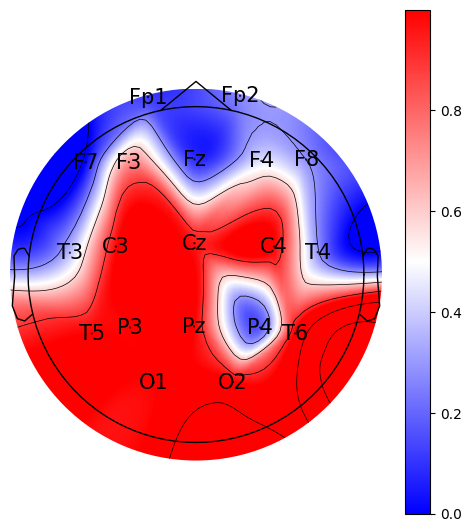

<Figure size 640x480 with 0 Axes>

In [118]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs, file_name="plv_mean")

In [119]:
all_g_degrees = gen_degrees(coh_graphs)

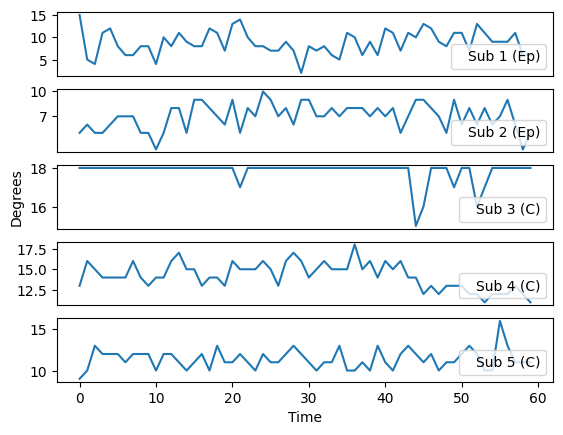

In [120]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(511)
plt.xticks([])
plt.plot(all_g_degrees[8, :, -1].T , label='Sub 1 (Ep)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(512)
plt.xticks([])
plt.yticks([7, 10])
plt.plot(all_g_degrees[6, :, -1].T, label='Sub 2 (Ep)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(513)
plt.ylabel('Degrees')
plt.xticks([])
plt.plot(all_g_degrees[7, :, -1].T, label='Sub 3 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(514)
plt.xticks([])
plt.plot(all_g_degrees[5, :, -1].T, label='Sub 4 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(515)
plt.plot(all_g_degrees[9, :, -1].T, label='Sub 5 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.xlabel('Time')
plt.savefig("figures/sub_degrees_coh.pdf", bbox_inches='tight')
plt.show()

In [121]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(511)
plt.xticks([])
plt.plot(all_g_degrees[10, :, 0].T, label='FP1')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(512)
plt.xticks([])
plt.plot(all_g_degrees[10, :, 1].T, label='FP7')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(513)
plt.ylabel('Degrees')
plt.yticks([7, 12])
plt.xticks([])
plt.plot(all_g_degrees[10, :, 2].T, label='F7')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(514)
plt.xticks([])
plt.plot(all_g_degrees[10, :, 3].T, label='F3')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(515)
plt.plot(all_g_degrees[10, :, 4].T, label='FZ')
plt.legend(loc='lower right', handlelength=0.)
plt.xlabel('Time')
plt.savefig("figures/ch_degree_coh.pdf", bbox_inches='tight')
plt.show()

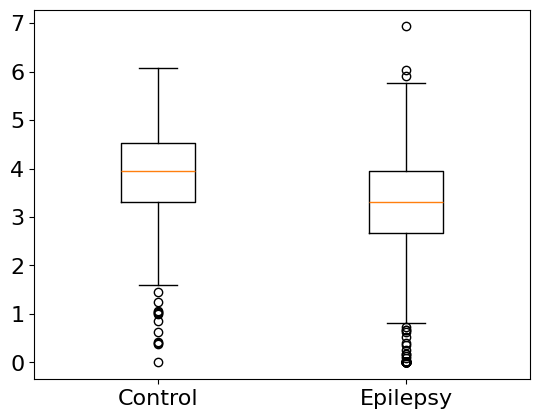

In [122]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_g_degrees.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_g_degrees[i]))
        normal_mean.append(np.mean(all_g_degrees[i]))
    else:
        ep_std.append(np.std(all_g_degrees[i]))
        ep_mean.append(np.mean(all_g_degrees[i]))
        
my_dict = {'Control': normal_std, 'Epilepsy': ep_std}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
plt.yticks(fontsize=16)

fig.savefig("figures/degree_groups_coh.pdf", bbox_inches='tight')

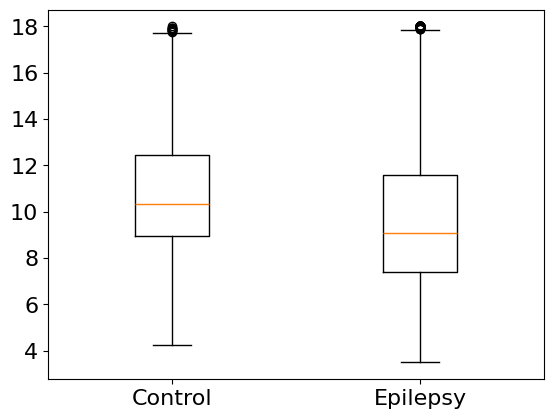

In [123]:
my_dict = {'Control': normal_mean, 'Epilepsy': ep_mean}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
plt.yticks(fontsize=16)
#ax.set_aspect(0.1)
fig.savefig("figures/degree_groups_mean_coh.pdf", bbox_inches='tight')

In [124]:
from scipy.stats import f

# Calculate the sample variances
variance1 = np.var(normal_std, ddof=1)
variance2 = np.var(ep_std, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_std) - 1
df2 = len(ep_std) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

#f_statistic, p_value = f_oneway(normal_mean, ep_mean)
alpha = 0.05

print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 0.004615769411990237
Reject the null hypothesis


In [125]:
from scipy.stats import f

# Calculate the sample variances
variance1 = np.var(normal_mean, ddof=1)
variance2 = np.var(ep_mean, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_mean) - 1
df2 = len(ep_mean) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

#f_statistic, p_value = f_oneway(normal_mean, ep_mean)
alpha = 0.05

print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 0.0007505712246967687
Reject the null hypothesis


In [126]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_g_degrees.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_g_degrees[i], axis=0))
        normal_mean.append(np.mean(all_g_degrees[i], axis=0))
    else:
        ep_std.append(np.std(all_g_degrees[i], axis=0))
        ep_mean.append(np.mean(all_g_degrees[i], axis=0))

normal_std = np.array(normal_std)
ep_std = np.array(ep_std)
ch_names = ["FP1", "FP2", "F7", "F3", "FZ", "F4", "F8",
            "T3", "C3", "CZ", "C4", "T4", "T5",
            "P3", "PZ", "P4", "T6", "O1", "O2"]
signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_std[:, ch_idx], ddof=1)
    variance2 = np.var(ep_std[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_std[:, ch_idx]) - 1
    df2 = len(ep_std[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.9930580479785123
FP2 : 0.9218491956740164
F7 : 0.9857862189289103
F3 : 0.9326237105349511
FZ : 0.4221319429101859
F4 : 0.8249082569809856
F8 : 0.9983691219223901
T3 : 0.9207764755397688
C3 : 0.009696552947665015
Reject the null hypothesis
CZ : 0.00432184555142337
Reject the null hypothesis
C4 : 0.017537751566787604
Reject the null hypothesis
T4 : 0.9032101131265065
T5 : 0.07695298213550521
P3 : 0.0011217244262103762
Reject the null hypothesis
PZ : 9.290675849800038e-05
Reject the null hypothesis
P4 : 0.4220380996904192
T6 : 0.13756259008979646
O1 : 0.003909333944963494
Reject the null hypothesis
O2 : 0.006861910411065117
Reject the null hypothesis


In [127]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs, file_name="coh_std")

<Figure size 2000x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [128]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_g_degrees.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_g_degrees[i], axis=0))
        normal_mean.append(np.mean(all_g_degrees[i], axis=0))
    else:
        ep_std.append(np.std(all_g_degrees[i], axis=0))
        ep_mean.append(np.mean(all_g_degrees[i], axis=0))

normal_mean = np.array(normal_mean)
ep_mean = np.array(ep_mean)
ch_names = ["FP1", "FP2", "F7", "F3", "FZ", "F4", "F8",
            "T3", "C3", "CZ", "C4", "T4", "T5",
            "P3", "PZ", "P4", "T6", "O1", "O2"]
signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_mean[:, ch_idx], ddof=1)
    variance2 = np.var(ep_mean[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_mean[:, ch_idx]) - 1
    df2 = len(ep_mean[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.946001993309706
FP2 : 0.8784550351508567
F7 : 0.9994647092585153
F3 : 0.2607459112177649
FZ : 0.9129342483306093
F4 : 0.7667102473379579
F8 : 0.8094294617700241
T3 : 0.8059020693543644
C3 : 0.0009556296304203116
Reject the null hypothesis
CZ : 0.015046428669452574
Reject the null hypothesis
C4 : 0.00013833614840381568
Reject the null hypothesis
T4 : 0.8729970181352346
T5 : 0.006170586001289787
Reject the null hypothesis
P3 : 0.00040010462714793485
Reject the null hypothesis
PZ : 3.6857951478308e-11
Reject the null hypothesis
P4 : 0.9814878665224173
T6 : 0.014883218354955497
Reject the null hypothesis
O1 : 7.636195005098724e-06
Reject the null hypothesis
O2 : 1.3491734338679364e-05
Reject the null hypothesis


In [129]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs, file_name="coh_mean")

<Figure size 2000x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Betweenness Centrality

In [22]:
plv_graphs = np.load("../saved_npy_ep/features/train_graphs_plv.npy", mmap_mode="c").astype(np.float16)
plv_graphs = norm_adj(plv_graphs)

coh_graphs = np.load("../saved_npy_ep/features/train_graphs_coh.npy", mmap_mode="c").astype(np.float16)
coh_graphs = norm_adj(coh_graphs)
train_labels = np.load("../saved_npy_ep/features/train_y.npy", mmap_mode="c").astype(np.float16)

In [23]:
all_bet_cent = []
for i in range(plv_graphs.shape[0]):
    all_cent = []
    for j in range(plv_graphs.shape[1]):
        g = plv_graphs[i, j]
        g = (g - g.min())/(g.max() - g.min())
        g[g<0.5] = 0
        g[g>=0.5] = 1
        g = nx.Graph(g)
        cent = nx.betweenness_centrality(g, normalized=True)
        cent = cent.values()
        all_cent.append(list(cent))
    all_bet_cent.append(all_cent)
all_bet_cent = np.array(all_bet_cent)

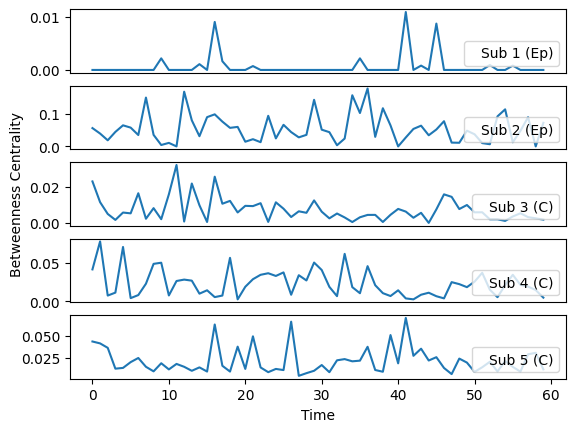

In [24]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(511)
plt.xticks([])
plt.plot(all_bet_cent[8, :, -1].T, label='Sub 1 (Ep)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(512)
plt.xticks([])
plt.plot(all_bet_cent[6, :, -1].T, label='Sub 2 (Ep)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(513)
plt.ylabel('Betweenness Centrality')
plt.xticks([])
plt.plot(all_bet_cent[7, :, -1].T, label='Sub 3 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(514)
plt.xticks([])
plt.plot(all_bet_cent[5, :, -1].T, label='Sub 4 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(515)
plt.plot(all_bet_cent[9, :, -1].T, label='Sub 5 (C)')
plt.legend(loc='lower right', handlelength=0.)
plt.xlabel('Time')
plt.savefig("figures/sub_cent.pdf", bbox_inches='tight')
plt.show()

In [25]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(511)
plt.xticks([])
plt.plot(all_bet_cent[10, :, 0].T, label='FP1')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(512)
plt.xticks([])
plt.plot(all_bet_cent[10, :, 1].T, label='FP7')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(513)
plt.ylabel('Betweenness Centrality')
plt.xticks([])
plt.plot(all_bet_cent[10, :, 2].T, label='F7')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(514)
plt.xticks([])
plt.plot(all_bet_cent[10, :, 3].T, label='F3')
plt.legend(loc='lower right', handlelength=0.)
plt.subplot(515)
plt.plot(all_bet_cent[10, :, 4].T, label='FZ')
plt.legend(loc='lower right', handlelength=0.)
plt.xlabel('Time')
plt.savefig("figures/ch_cent.pdf", bbox_inches='tight')
plt.show()

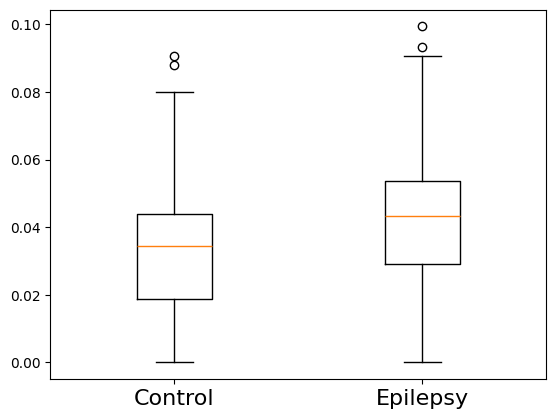

In [26]:
normal_mean = []
ep_mean = []
for i in range(all_bet_cent.shape[0]):
    if train_labels[i][0] == 0:
        normal_mean.append(np.mean(all_bet_cent[i]))
    else:
        ep_mean.append(np.mean(all_bet_cent[i]))
        
my_dict = {'Control': normal_mean, 'Epilepsy': ep_mean}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
fig.savefig("figures/cent_mean_groups.pdf", bbox_inches='tight')

In [27]:
normal_std = []
ep_std = []
for i in range(all_bet_cent.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_bet_cent[i]))
    else:
        ep_std.append(np.std(all_bet_cent[i]))
        
my_dict = {'Control': normal_std, 'Epilepsy': ep_std}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), widths=0.3)
ax.set_xticklabels(my_dict.keys(), fontsize=16)
fig.savefig("figures/cent_mean_groups.pdf", bbox_inches='tight')

In [28]:
from scipy.stats import f

# Calculate the sample variances
variance1 = np.var(normal_mean, ddof=1)
variance2 = np.var(ep_mean, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_mean) - 1
df2 = len(ep_mean) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

#f_statistic, p_value = f_oneway(normal_mean, ep_mean)
alpha = 0.05

print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 0.006441095681773614
Reject the null hypothesis


In [29]:
from scipy.stats import f

# Calculate the sample variances
variance1 = np.var(normal_std, ddof=1)
variance2 = np.var(ep_std, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(normal_std) - 1
df2 = len(ep_std) - 1

# Calculate the p-value
p_value = f.cdf(f_value, df1, df2)

#f_statistic, p_value = f_oneway(normal_mean, ep_mean)
alpha = 0.05

print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis")

P-value: 1.343794438081679e-05
Reject the null hypothesis


In [32]:
normal_std = []
ep_std = []
normal_mean = []
ep_mean = []
for i in range(all_bet_cent.shape[0]):
    if train_labels[i][0] == 0:
        normal_std.append(np.std(all_bet_cent[i], axis=0))
        normal_mean.append(np.mean(all_bet_cent[i], axis=0))
    else:
        ep_std.append(np.std(all_bet_cent[i], axis=0))
        ep_mean.append(np.mean(all_bet_cent[i], axis=0))

normal_std = np.array(normal_std)
ep_std = np.array(ep_std)
ch_names = ["FP1", "FP2", "F7", "F3", "FZ", "F4", "F8",
            "T3", "C3", "CZ", "C4", "T4", "T5",
            "P3", "PZ", "P4", "T6", "O1", "O2"]
signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_std[:, ch_idx], ddof=1)
    variance2 = np.var(ep_std[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_std[:, ch_idx]) - 1
    df2 = len(ep_std[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.6925776668882934
FP2 : 0.30748677069565383
F7 : 0.0013094979607716757
Reject the null hypothesis
F3 : 0.254675740126436
FZ : 0.01715274515088497
Reject the null hypothesis
F4 : 0.3253997599190863
F8 : 0.7008173373316041
T3 : 0.1473091417288658
C3 : 0.006184309566007283
Reject the null hypothesis
CZ : 1.1659189176605944e-05
Reject the null hypothesis
C4 : 0.13056780123256823
T4 : 0.04322552484108889
Reject the null hypothesis
T5 : 0.9371266294107597
P3 : 0.00018462583837462797
Reject the null hypothesis
PZ : 1.1788670881026767e-05
Reject the null hypothesis
P4 : 3.212713534658843e-08
Reject the null hypothesis
T6 : 0.5010909760879629
O1 : 0.009473376474294058
Reject the null hypothesis
O2 : 0.9507836398992355


<Figure size 2000x400 with 0 Axes>

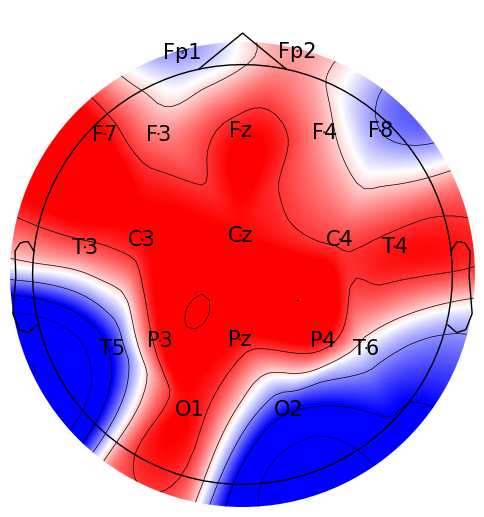

<Figure size 640x480 with 0 Axes>

In [33]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs)

In [34]:
normal_mean = np.array(normal_mean)
ep_mean = np.array(ep_mean)

signs = []
for ch_idx in range(19):
    # Calculate the sample variances
    variance1 = np.var(normal_mean[:, ch_idx], ddof=1)
    variance2 = np.var(ep_mean[:, ch_idx], ddof=1)
    
    # Calculate the F-statistic
    f_value = variance1 / variance2
    
    # Calculate the degrees of freedom
    df1 = len(normal_mean[:, ch_idx]) - 1
    df2 = len(ep_mean[:, ch_idx]) - 1
    
    # Calculate the p-value
    p_value = f.cdf(f_value, df1, df2)
    
    alpha = 0.05
    #print(f"F-statistic: {f_statistic}")
    print(ch_names[ch_idx], ":", p_value)
    if p_value < alpha:
        print("Reject the null hypothesis")
    sign = 1 - p_value
    signs.append(sign)

FP1 : 0.0001305881399721071
Reject the null hypothesis
FP2 : 0.0030472931547916825
Reject the null hypothesis
F7 : 6.291025611787442e-06
Reject the null hypothesis
F3 : 0.00014798959762880293
Reject the null hypothesis
FZ : 0.6239334376188306
F4 : 3.324622424671875e-05
Reject the null hypothesis
F8 : 0.03360315076018956
Reject the null hypothesis
T3 : 0.01959991561775312
Reject the null hypothesis
C3 : 0.9037650939549133
CZ : 1.9366237330120807e-05
Reject the null hypothesis
C4 : 0.6737219674002
T4 : 0.03160273700917161
Reject the null hypothesis
T5 : 0.9714612193893231
P3 : 1.162063078856215e-06
Reject the null hypothesis
PZ : 2.179445838074951e-06
Reject the null hypothesis
P4 : 1.8451333278276636e-05
Reject the null hypothesis
T6 : 0.31309632293097506
O1 : 1.4593801896414056e-08
Reject the null hypothesis
O2 : 0.4918595687136163


<Figure size 2000x400 with 0 Axes>

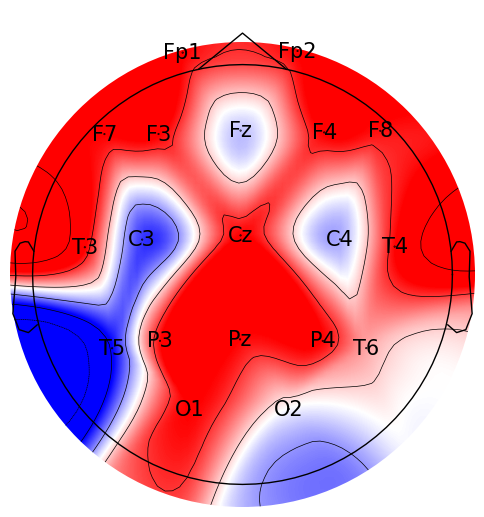

<Figure size 640x480 with 0 Axes>

In [35]:
signs = np.array(signs)
signs = signs.reshape(19, 1)
plot_bands_per_regions(signs)